In [1]:
from util.draw_graphs import plot_all, plot_range
"""
Some experiment code refer from https://github.com/amitport/Towards-Federated-Learning-with-Byzantine-Robust-Client-Weighting

We consider the declare sample size originally, but remove it since it is not the major problem in our method


The server aggregator using numpy, but we find that the computation seems large
However, cupy and tf.tensor is not as convinient as numpy 


From 500 round of FL, we only update the model if the loss descend.
We do not use gradient clips but it might make the federated learning more robust.


Author: Cen-Jhih Li
Belongs: Academia Sinica, Institute of Statistical Science, Robust federated learning project
"""
plot_list = ['mean', 'median', 'gamma_mean_0_5', 'geometric_median', 't_mean_10']
gamma_list = [0.5, 0.2, 0.05, 0.01 ]
gamma_name = ['gamma_mean_{}'.format(str(gamma).replace(".","_")) for gamma in gamma_list]

A total plot of gamma mean


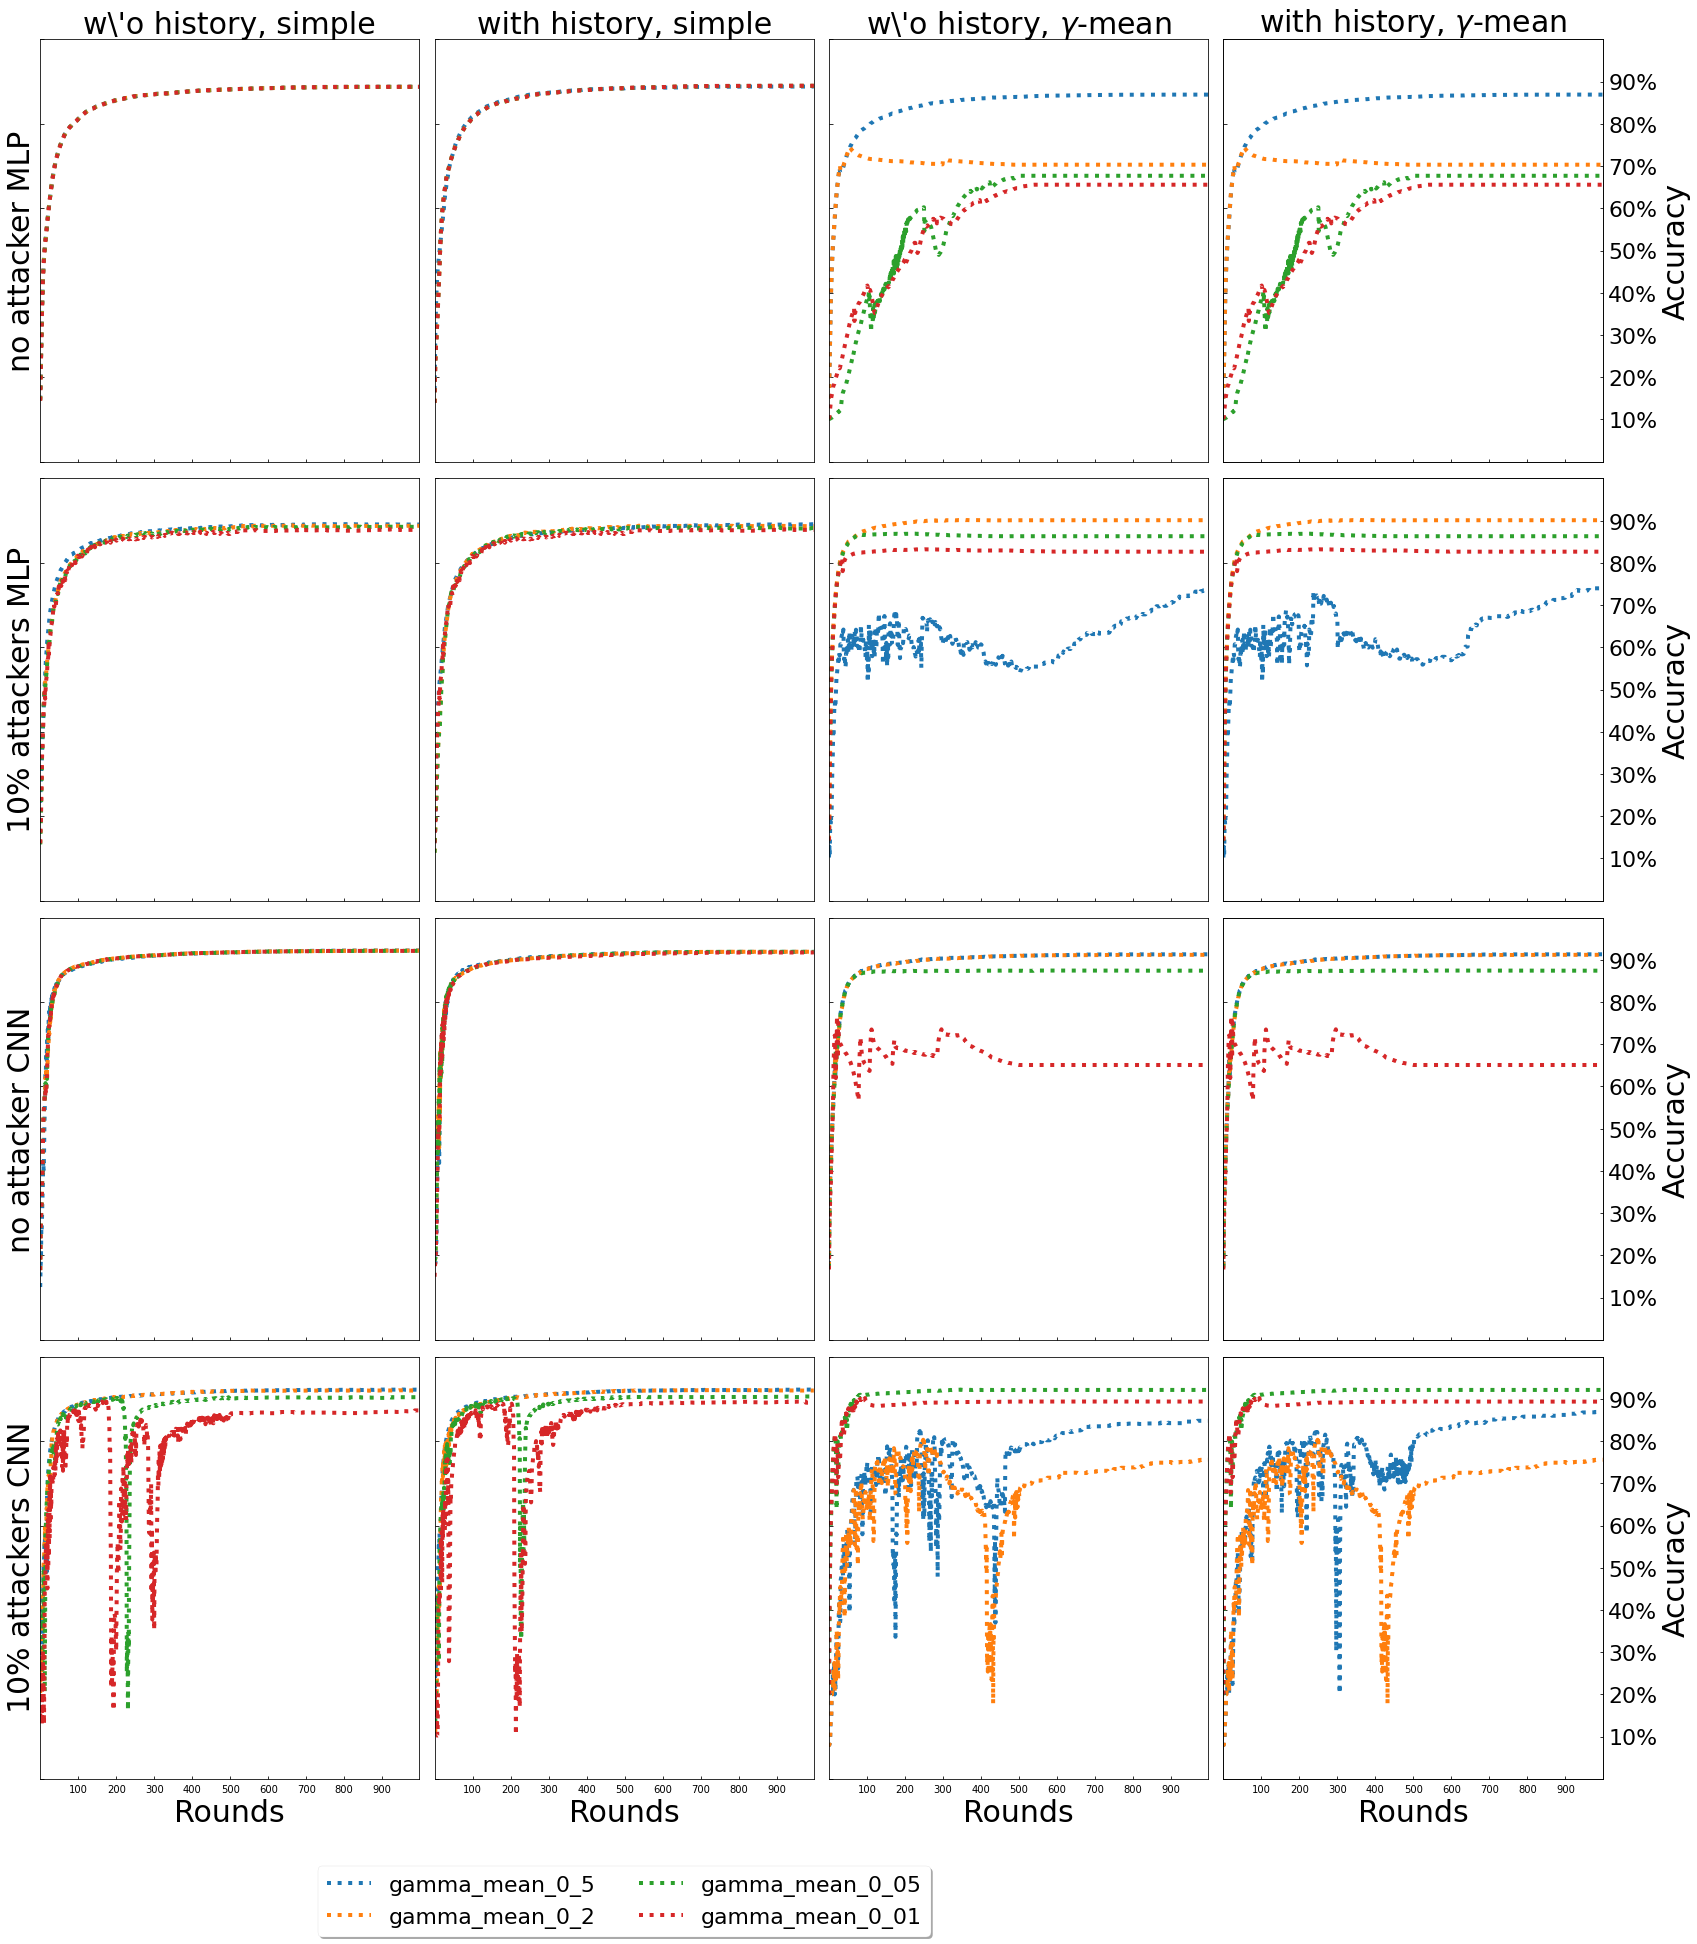

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print ('A total plot of gamma mean')

SMALL_SIZE = 10
MEDIUM_SIZE = 22
BIGGER_SIZE = 30

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(4, 4, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = axs

right_axs = (ax4, ax8, ax12, ax16)
bottom_axs = (ax13, ax14, ax15, ax16)

ax1.set_title(r'w\'o history, simple')
ax2.set_title(r'with history, simple')
ax3.set_title(r'w\'o history, $\gamma$-mean')
ax4.set_title(r'with history, $\gamma$-mean')


ax1.set_ylabel('no attacker MLP')
ax1.set_ylim(0, 1)#(0.5, 1)

ax5.set_ylabel('$10\%$ attackers MLP')
ax5.set_ylim(0, 1)#(0.5, 1)

ax9.set_ylabel('no attacker CNN')
ax9.set_ylim(0, 1)#(0.5, 1)

ax13.set_ylabel('$10\%$ attackers CNN')
ax13.set_ylim(0, 1)#(0.5, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

experiment = 'expr_MNIST_mlp'
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':') 
        for gamma in gamma_list
        ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':')
        for gamma in gamma_list
        ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1)

experiment = 'expr_MNIST_cnn'
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':')
        for gamma in gamma_list
        ]
    plot_range(exp_f1, axs[2][i], 0, 999, metric_idx=1)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_{str(gamma).replace(".","_")}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':')
        for gamma in gamma_list
        ]
    plot_range(exp_alpha_10, axs[3][i], 0, 999, metric_idx=1)

ax14.legend(
           labels=gamma_name,   # The labels for each line
           loc="lower center", 
           fontsize=MEDIUM_SIZE,
           bbox_to_anchor=(0.5,-0.4),
           fancybox=True,
           shadow=True,
           ncol=2
           )

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/exp_MNIST_gamma_mean_total_plot.png', format='png', bbox_inches='tight')

Analize the results with and without covariance, record gradients and not record in gamma mean 

Then compare different gamma first

Finally, evaluate the results across different aggregators

Analize the results with and without covariance in gamma mean


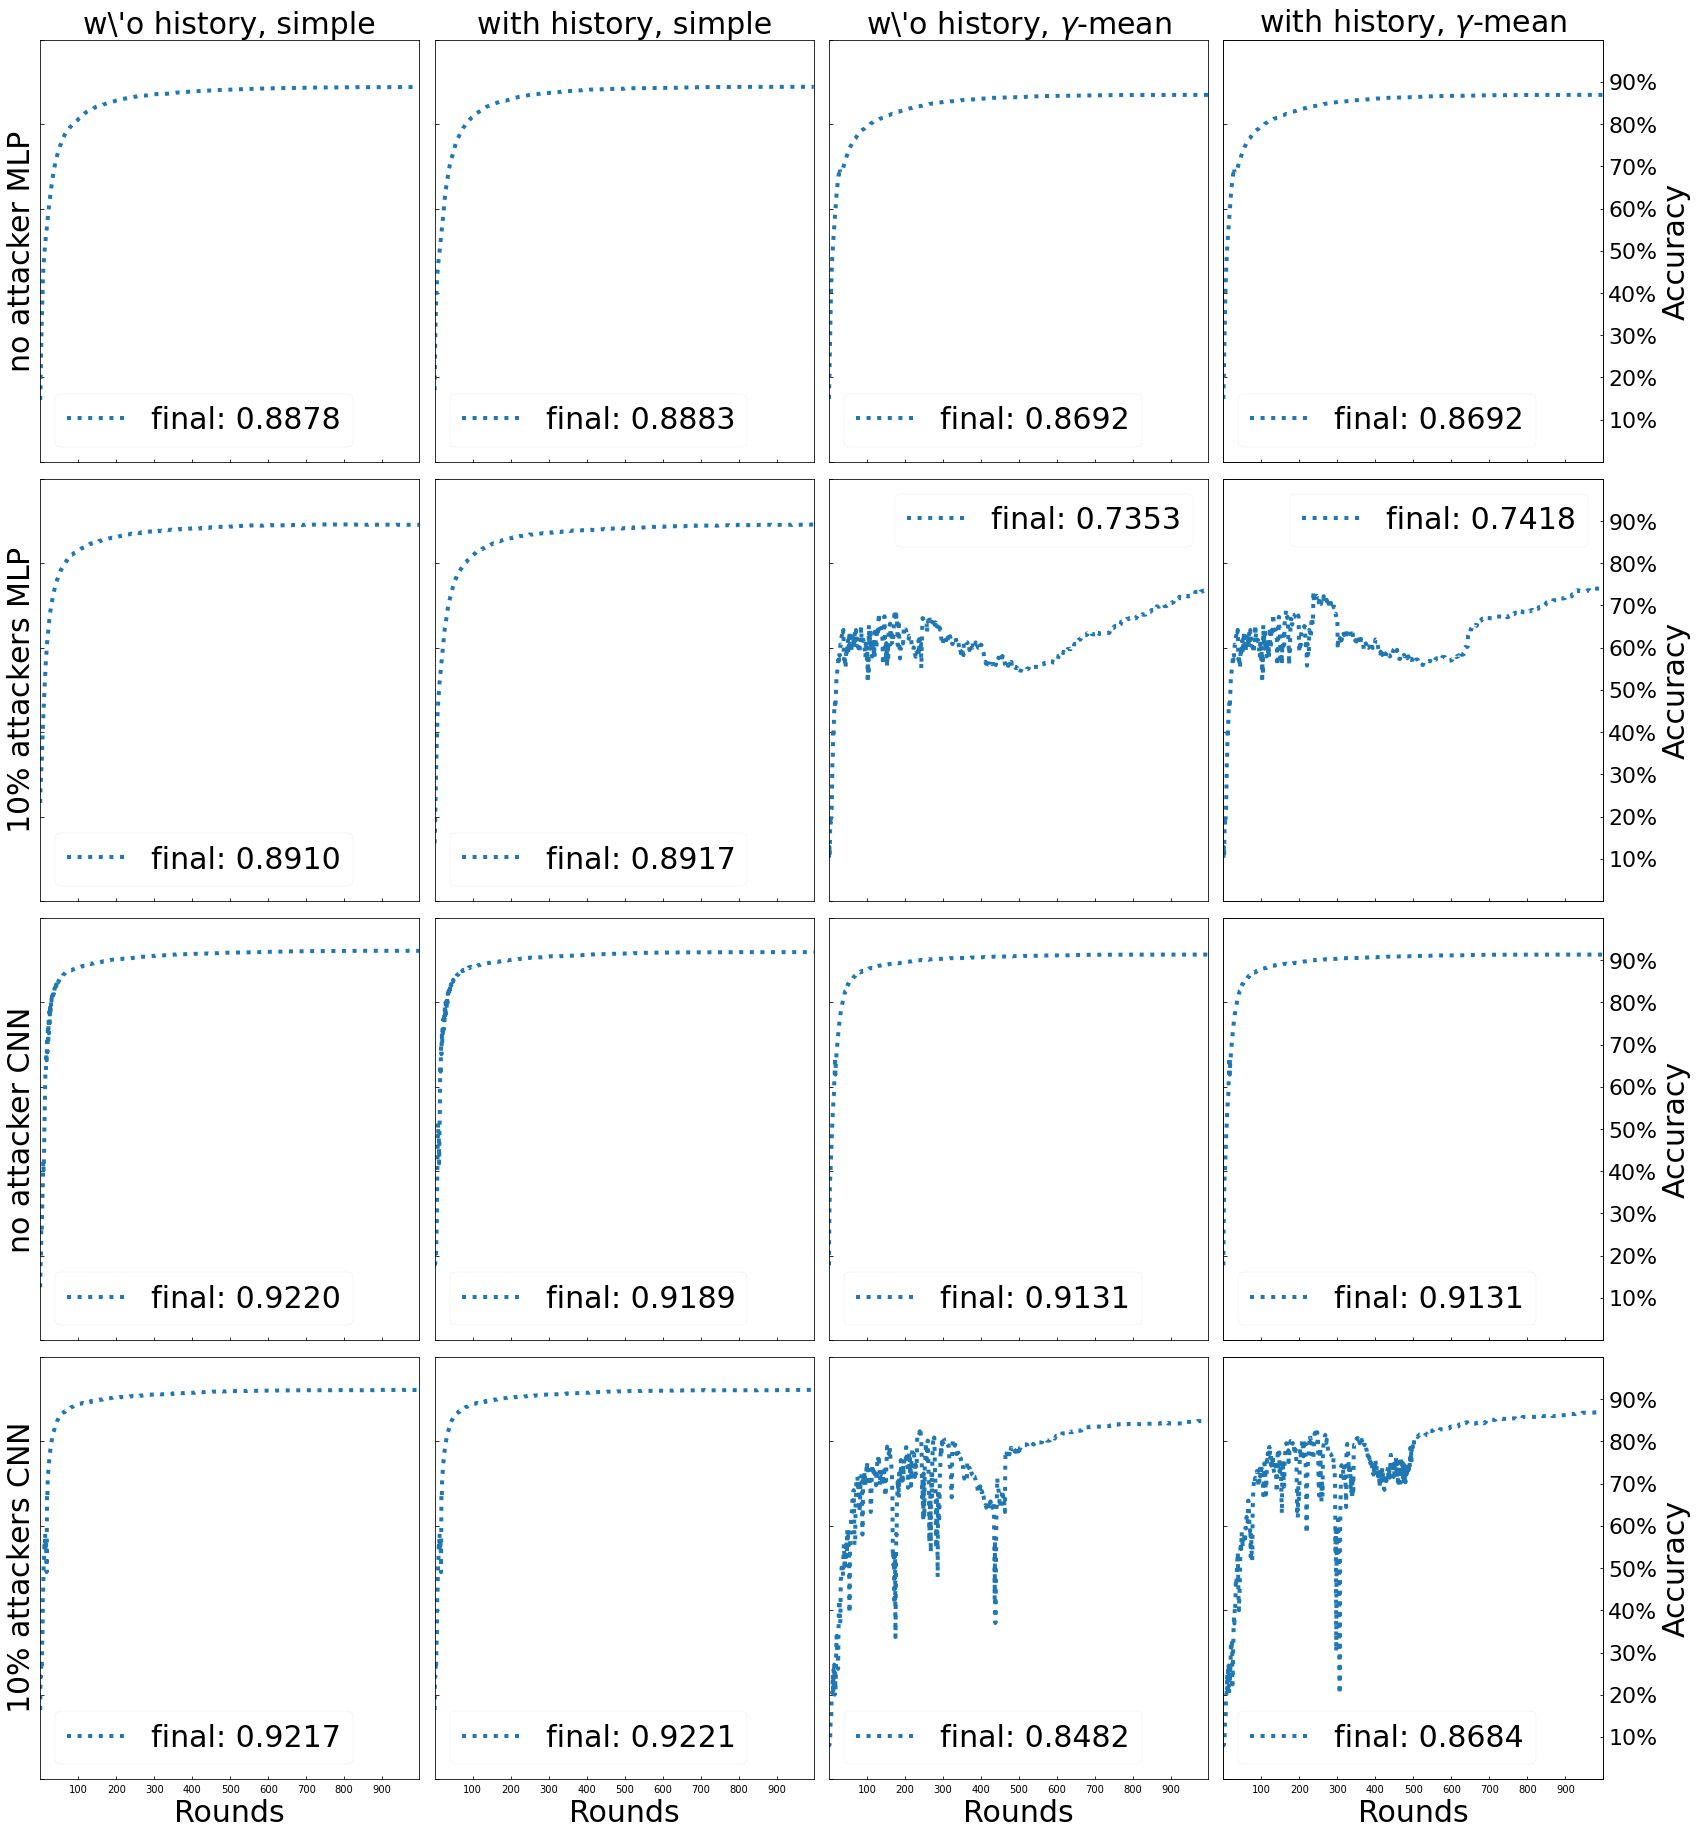

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print ('Analize the results with and without covariance in gamma mean')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(4, 4, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = axs

right_axs = (ax4, ax8, ax12, ax16)
bottom_axs = (ax13, ax14, ax15, ax16)

ax1.set_title(r'w\'o history, simple')
ax2.set_title(r'with history, simple')
ax3.set_title(r'w\'o history, $\gamma$-mean')
ax4.set_title(r'with history, $\gamma$-mean')


ax1.set_ylabel('no attacker MLP')
ax1.set_ylim(0, 1)

ax5.set_ylabel('$10\%$ attackers MLP')
ax5.set_ylim(0, 1)

ax9.set_ylabel('no attacker CNN')
ax9.set_ylim(0, 1)

ax13.set_ylabel('$10\%$ attackers CNN')
ax13.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

experiment = 'expr_MNIST_mlp'
gamma = 0.5
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    attack_type = 'no_attacks'
    aggr = '{}_{}'.format(aggr, str(gamma).replace(".","_"))
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

experiment = 'expr_MNIST_cnn'
for i, aggr in enumerate([f'simple_gamma_mean', f'simple_record_gamma_mean', f'gamma_mean', f'record_gamma_mean']):
    aggr = '{}_{}'.format(aggr, str(gamma).replace(".","_"))
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[2][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[3][i], 0, 999, metric_idx=1, label_final=True)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/exp_MNIST_gamma_mean_analize.png', format='png', bbox_inches='tight')

Compare different gamma


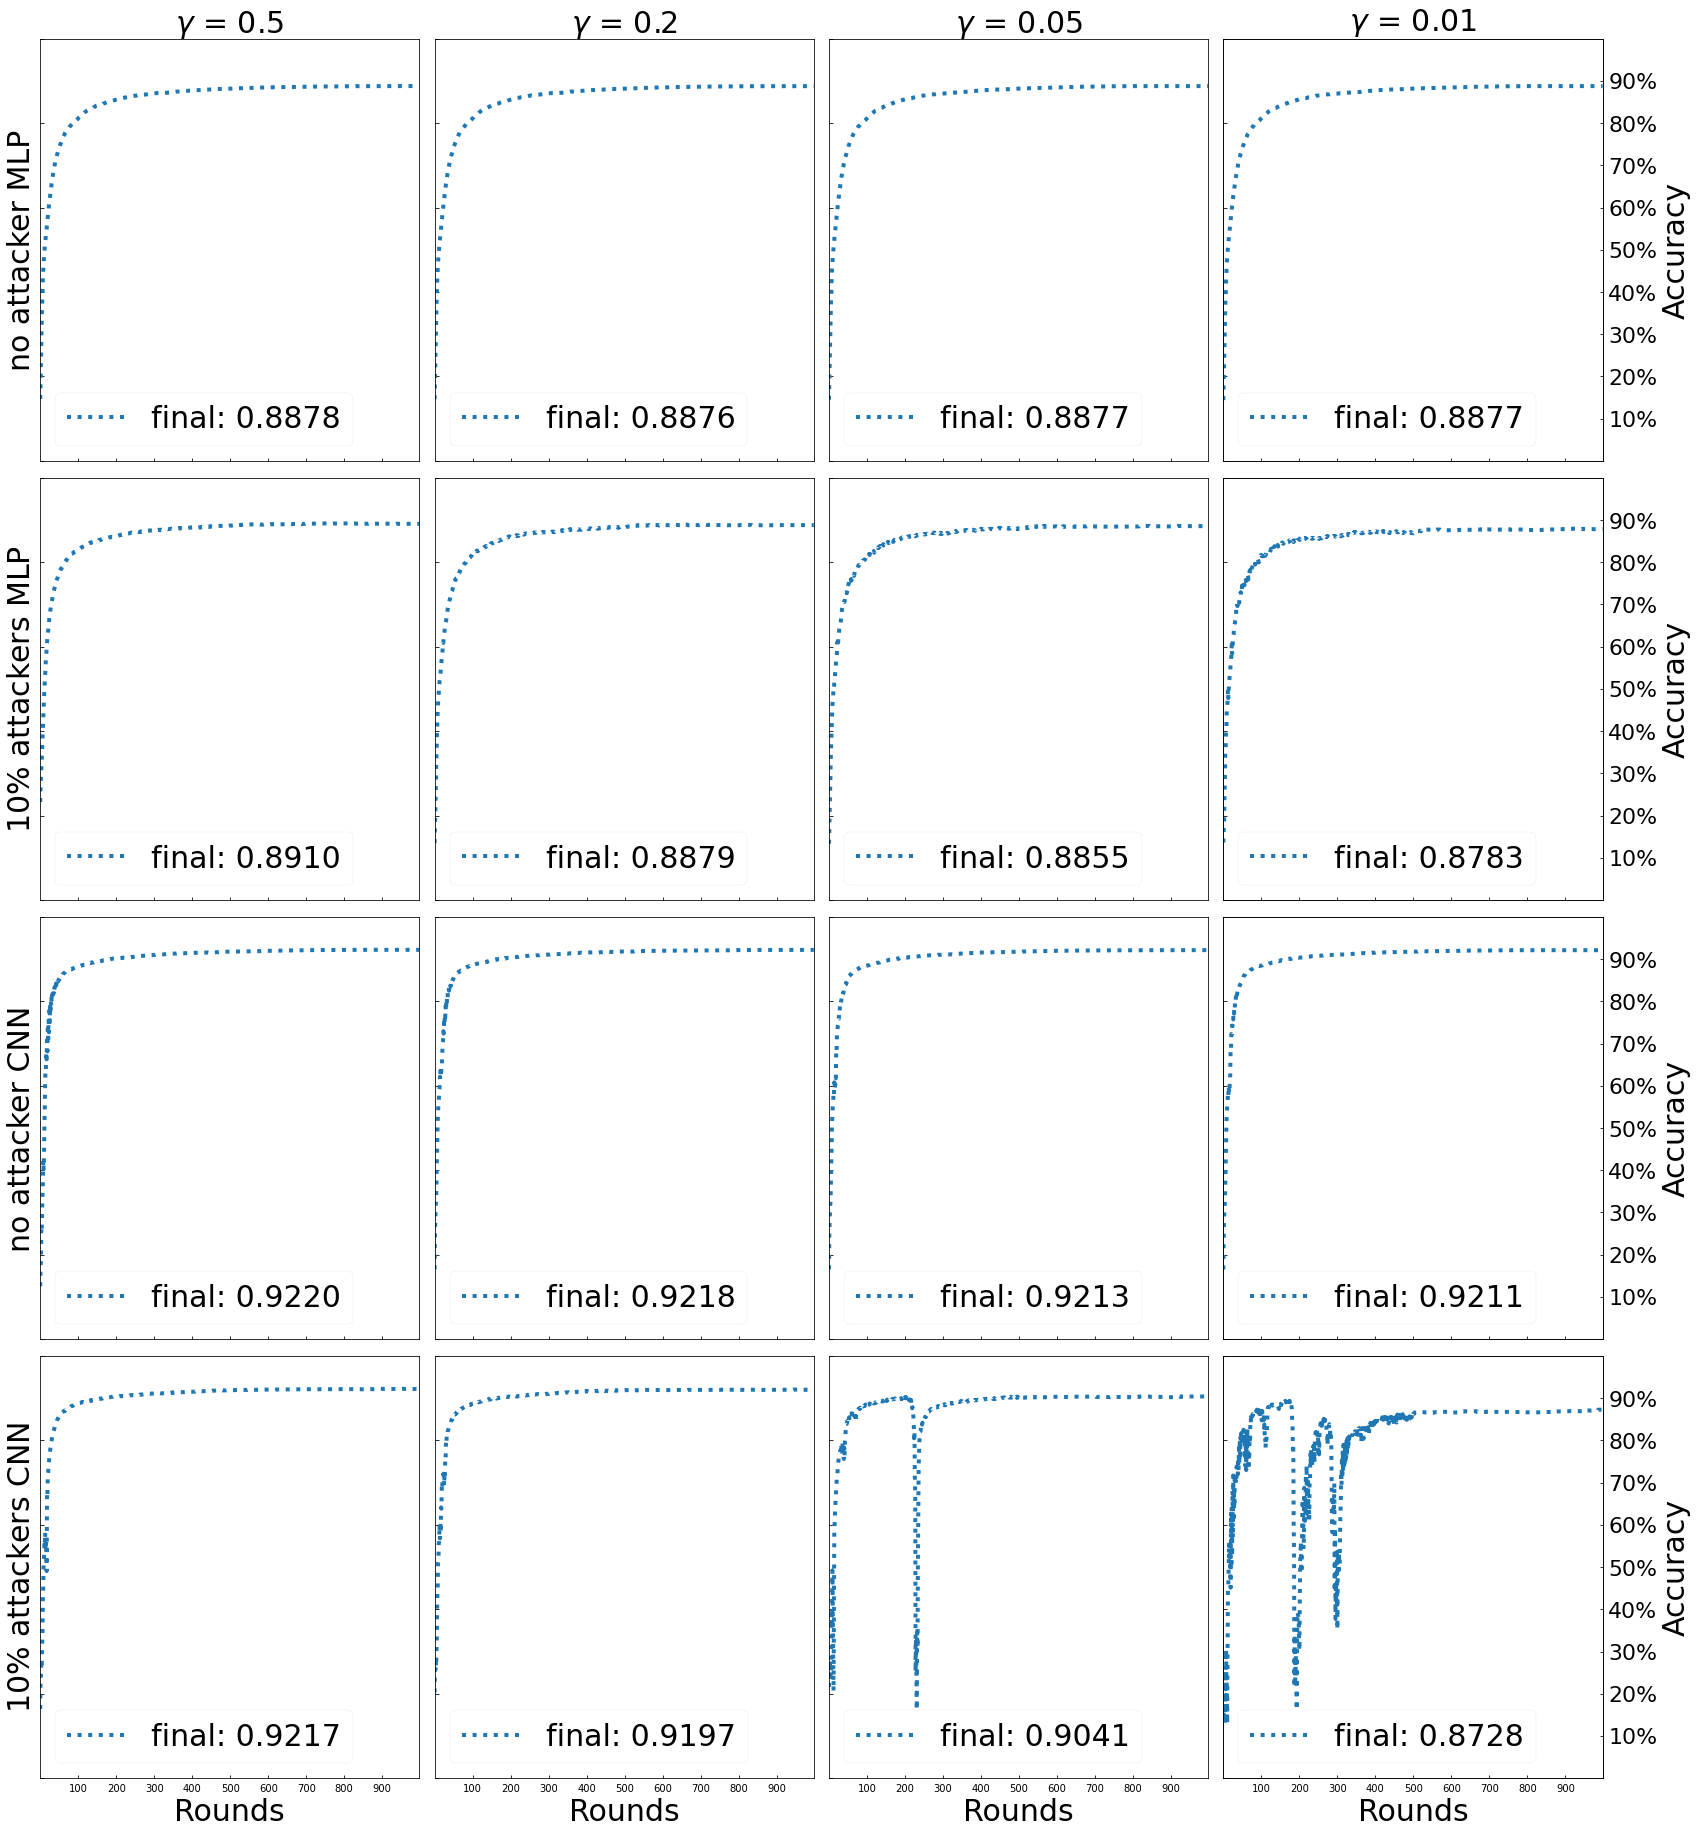

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Compare different gamma')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(4, 4, figsize=(28, 32), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16) = axs

right_axs = (ax4, ax8, ax12, ax16)
bottom_axs = (ax13, ax14, ax15, ax16)

ax1.set_title(r'$\gamma$ = {}'.format(0.5))
ax2.set_title(r'$\gamma$ = {}'.format(0.2))
ax3.set_title(r'$\gamma$ = {}'.format(0.05))
ax4.set_title(r'$\gamma$ = {}'.format(0.01))


ax1.set_ylabel('no attacker MLP')
ax1.set_ylim(0, 1)

ax5.set_ylabel('$10\%$ attackers MLP')
ax5.set_ylim(0, 1)

ax9.set_ylabel('no attacker CNN')
ax9.set_ylim(0, 1)

ax13.set_ylabel('$10\%$ attackers CNN')
ax13.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

experiment = 'expr_MNIST_mlp'
for i, gamma in enumerate(gamma_list):
    aggr = 'simple_gamma_mean_{}'.format(str(gamma).replace(".","_"))
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

experiment = 'expr_MNIST_cnn'
for i, gamma in enumerate(gamma_list):
    aggr = 'simple_gamma_mean_{}'.format(str(gamma).replace(".","_"))
    attack_type = 'no_attacks'
    exp_f1 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_f1, axs[2][i], 0, 999, metric_idx=1, label_final=True)

    attack_type = 'random'
    exp_alpha_10 = [
        (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'),
        ]
    plot_range(exp_alpha_10, axs[3][i], 0, 999, metric_idx=1, label_final=True)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/exp_MNIST_gamma_value.png', format='png', bbox_inches='tight')

Evaluate the results across different aggregators


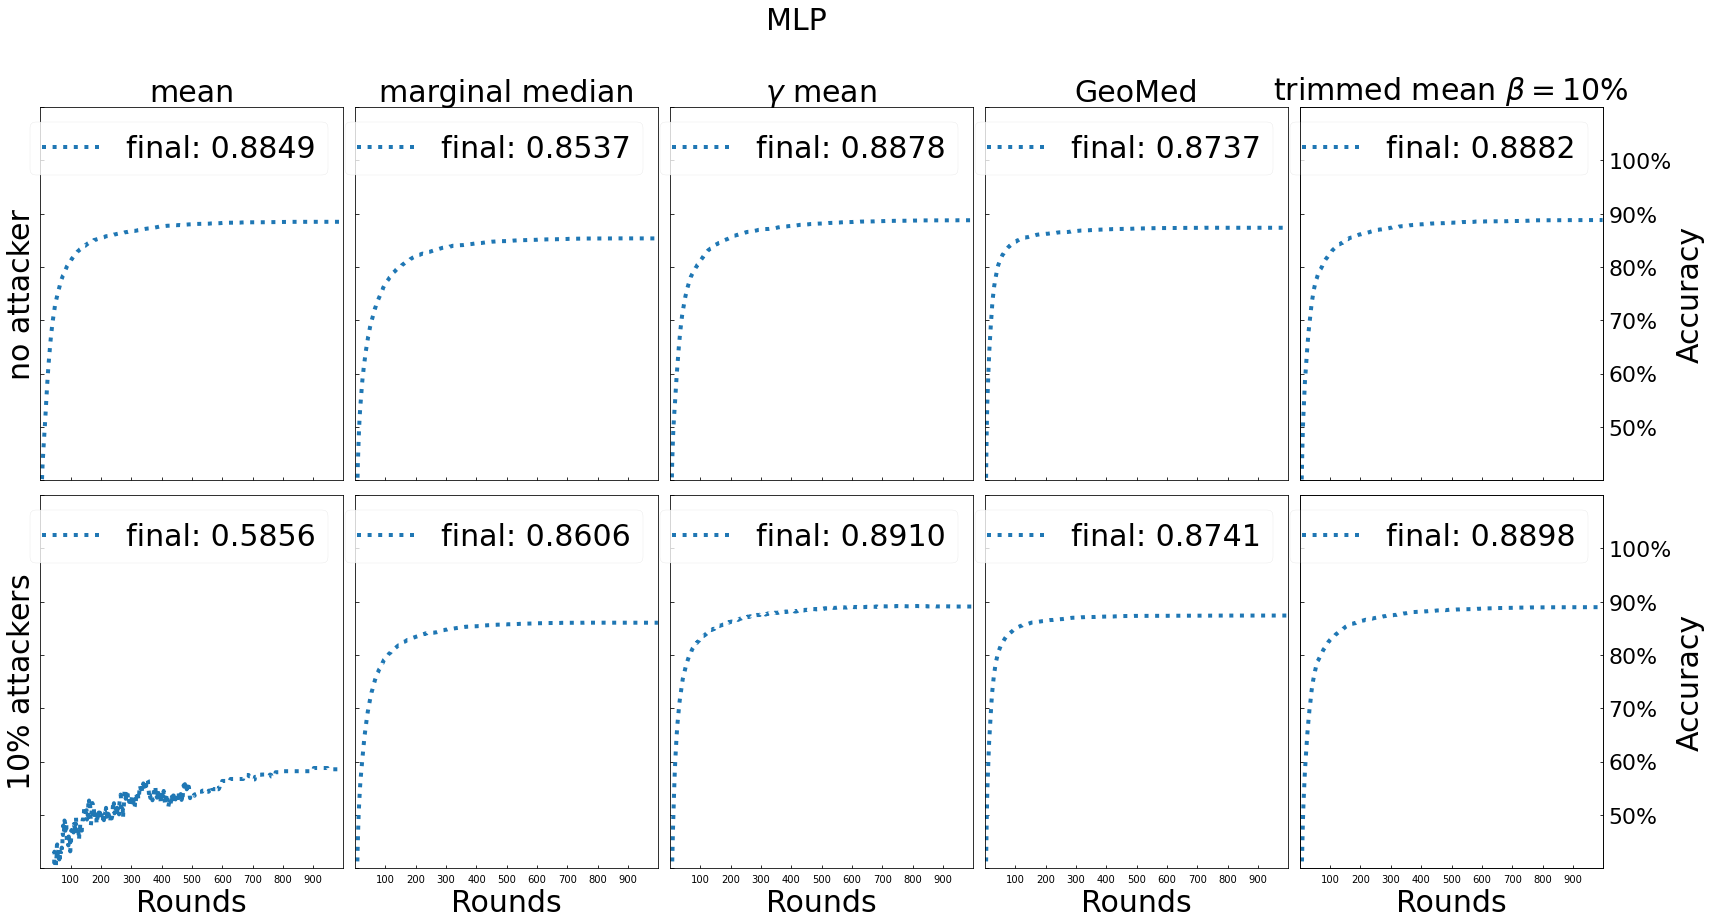

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr_MNIST_mlp', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('MLP')
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('GeoMed')
ax5.set_title(r'trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0.4, 1.1)

ax6.set_ylabel('$10\%$ attackers')
ax6.set_ylim(0.4, 1.1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(5, 11)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/exp_MNIST_MLP_attackers_10.png', format='png', bbox_inches='tight')

Evaluate the results across different aggregators


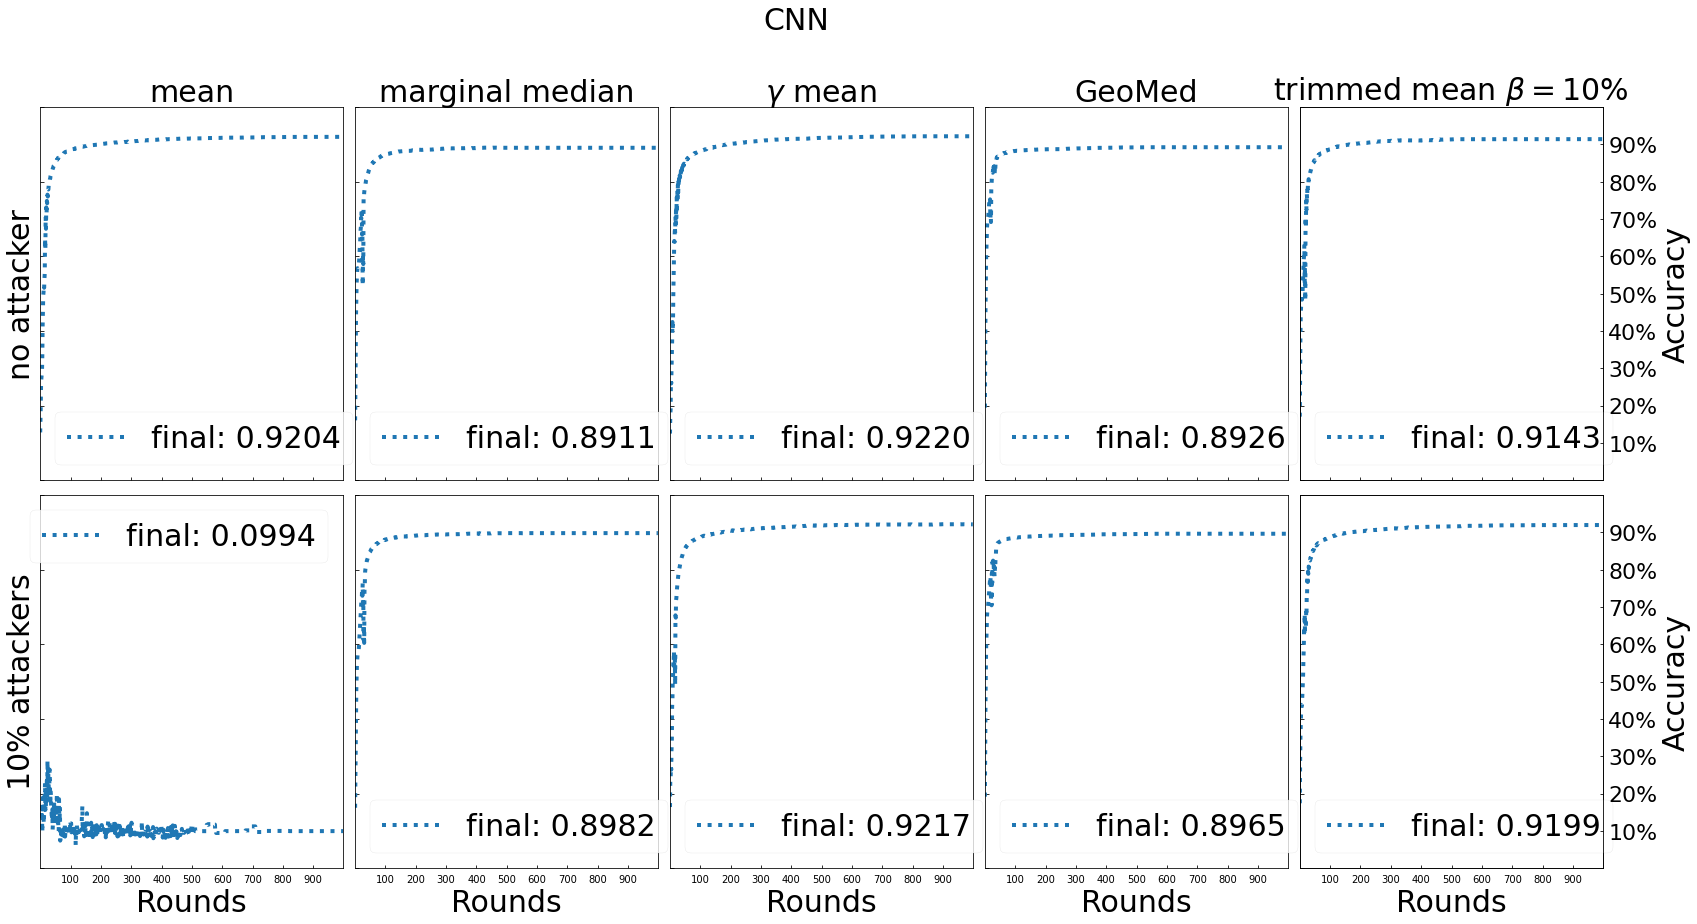

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr_MNIST_cnn', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('CNN')
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('GeoMed')
ax5.set_title(r'trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax6.set_ylabel('$10\%$ attackers')
ax6.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(1, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/exp_MNIST_CNN_attackers_10.png', format='png', bbox_inches='tight')

Evaluate the results across different aggregators


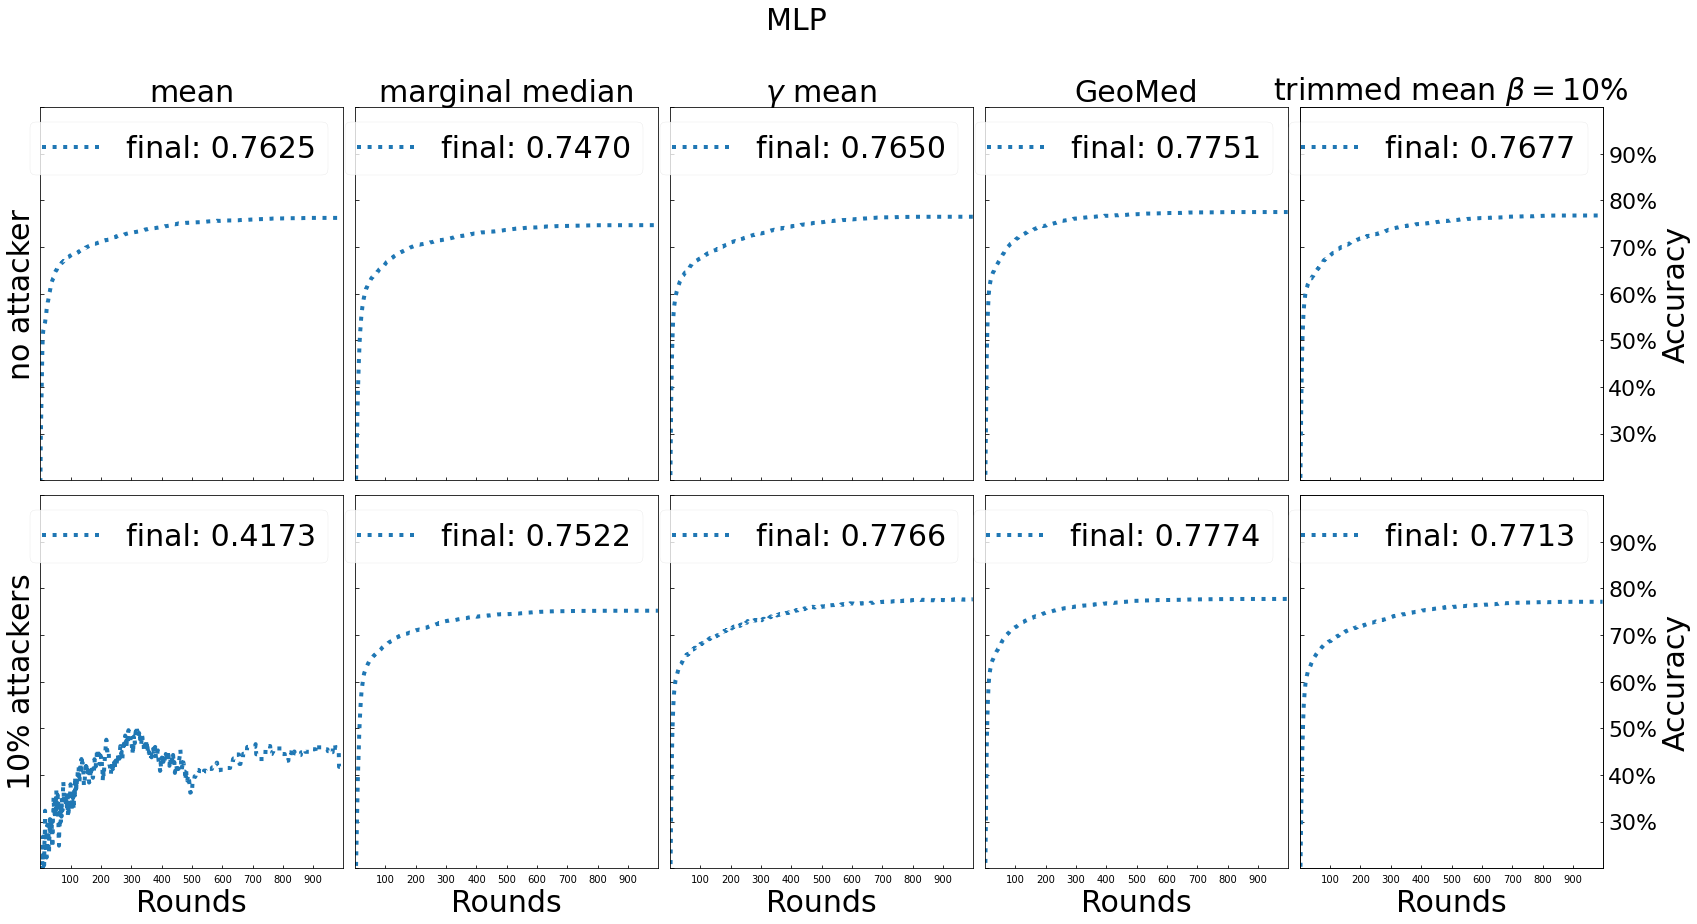

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr_fashion_mlp', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('MLP')
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('GeoMed')
ax5.set_title(r'trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0.2, 1) # (0.85, 1)

ax6.set_ylabel('$10\%$ attackers')
ax6.set_ylim(0.2, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(3, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()
    
fig.savefig('plot/exp_fashion_MLP_attackers_10.png', format='png', bbox_inches='tight')

Evaluate the results across different aggregators


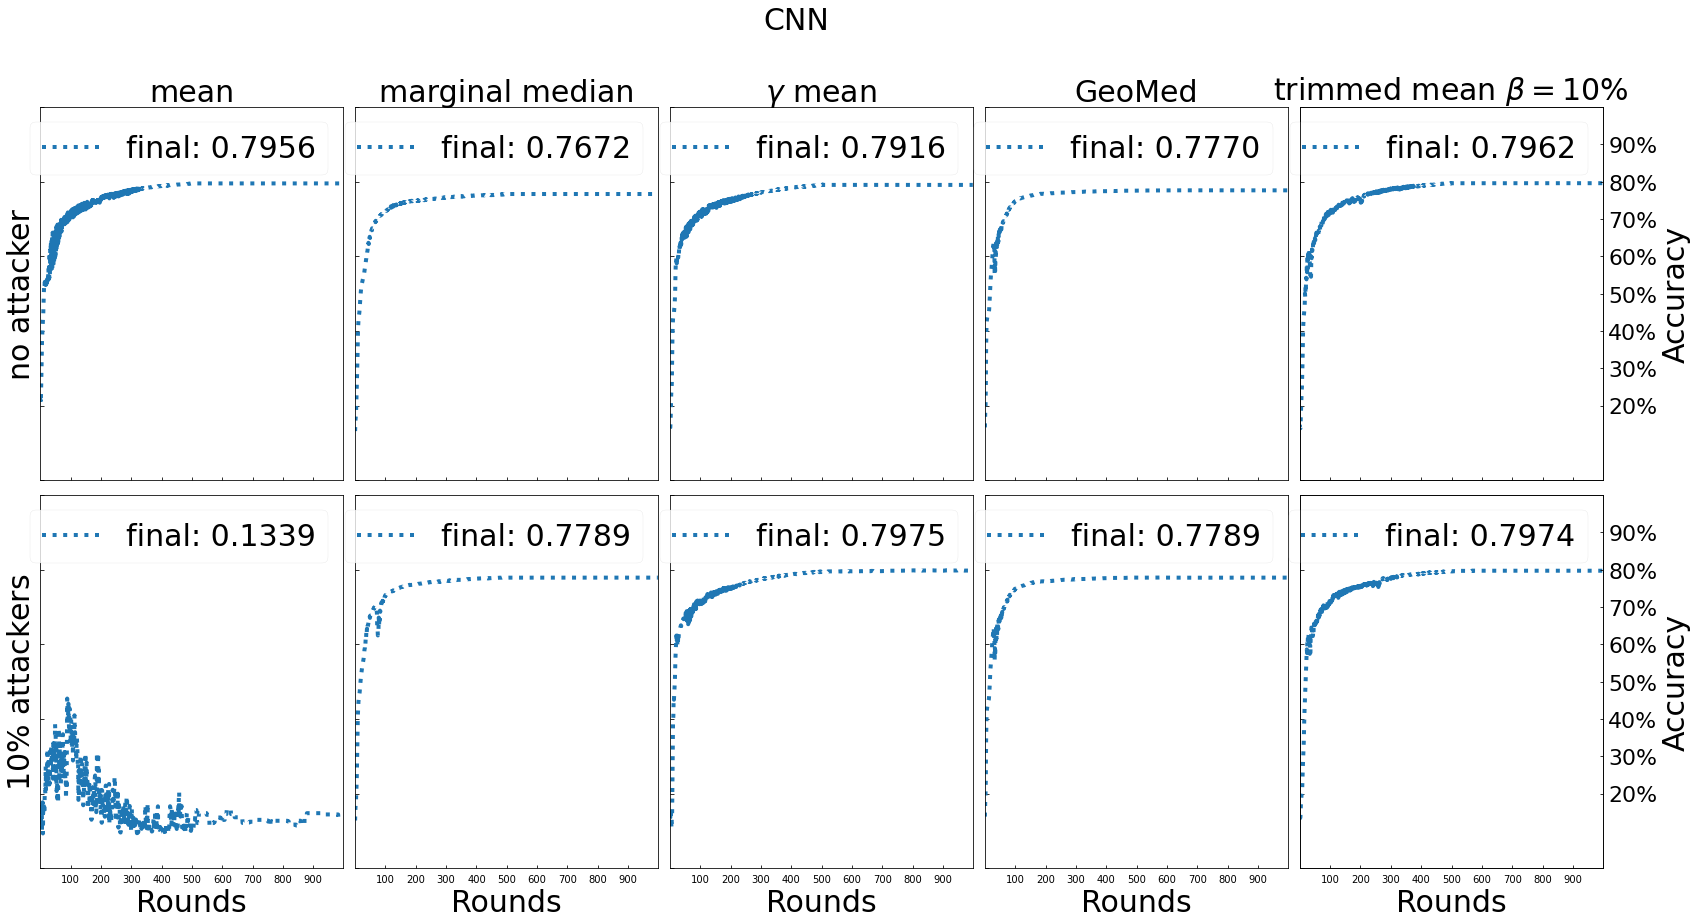

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Evaluate the results across different aggregators')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr, attack_type, real_alpha, num_samples_per_attacker = 'expr_fashion_cnn', 1, 'all', 'random', 10, 1000000   
fig, axs = plt.subplots(2, 5, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10) = axs

right_axs = (ax5, ax10)
bottom_axs = (ax6, ax7, ax8, ax9, ax10)

plt.suptitle('CNN')
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('GeoMed')
ax5.set_title(r'trimmed mean $\beta=10\%$')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)

ax6.set_ylabel('$10\%$ attackers')
ax6.set_ylim(0, 1)

nrows, ncols = axs.shape
for i in range(ncols):
    axs[-1][i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[-1][i].set_xticks(range(100, 1000, 100))
    
for i in range(nrows):
    a_l = axs[i][0]
    a_r = axs[i][-1].twinx()
    a_r.tick_params(direction="in")
    a_l.tick_params(labelleft=False)
    a_r.set_ylim(*a_l.get_ylim())
    a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
    a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    a_r.set_yticks([_ / 10 for _ in range(2, 10)])

for i, aggr in enumerate(plot_list):
    attack_type = 'no_attacks'
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[0][i], 0, 999, metric_idx=1, label_final=True)
    attack_type = 'random'
    if 'gamma_mean' in aggr:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/simple_{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    else:
        exp_alpha_10 = [
            (f'experiments/{experiment}_{attack_type}/seed_{seed}/{aggr}_cpr_{cpr}_b_{attack_type}_{real_alpha}_{num_samples_per_attacker}', f'{aggr}[1] byz', 0.6, ':'), 
            ]
    plot_range(exp_alpha_10, axs[1][i], 0, 999, metric_idx=1, label_final=True)

#ax8.legend(
#           labels=['no cov', 'no cov with record gradients', 'with cov', 'with cov with record gradients'],   # The labels for each line
#           loc="lower center",   # Position of legend
#            borderpad=0.5,    # Small spacing around legend box
#            title="gamma mean type",  # Title for the legend
#         fontsize=MEDIUM_SIZE,
#           bbox_to_anchor=(0.5,-0.26),
#           fancybox=True, 
#            shadow=True,
#           ncol=2
#)
for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()
    
fig.savefig('plot/exp_fashion_CNN_attackers_10.png', format='png', bbox_inches='tight')

Xray pneumonia resnet


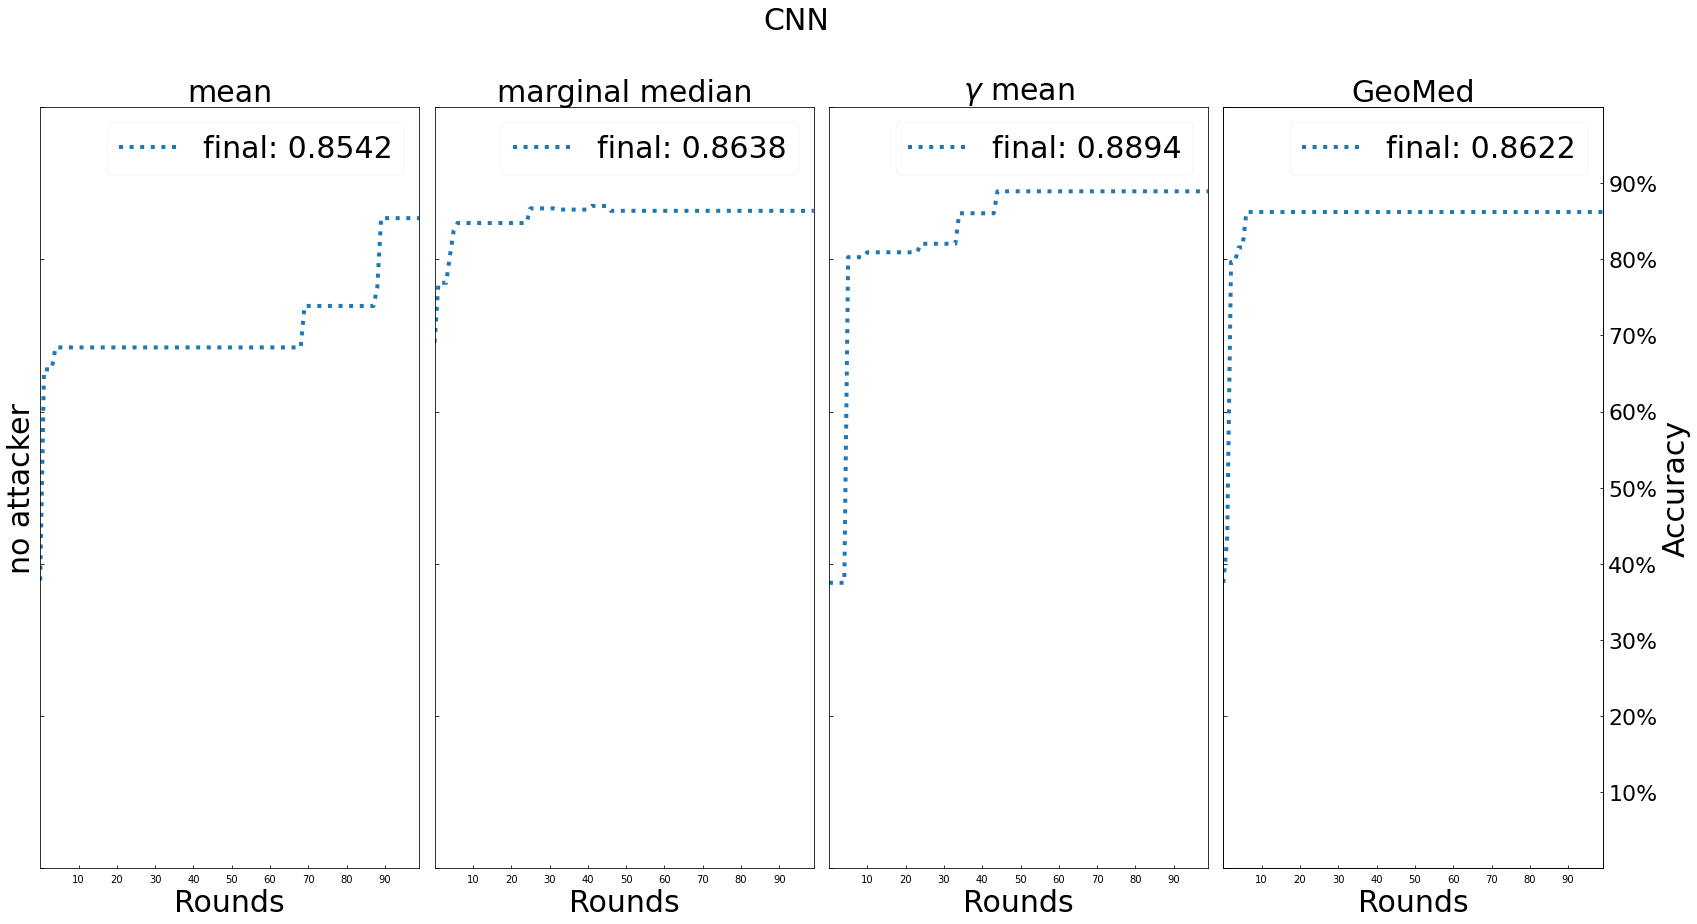

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl 

print('Xray pneumonia resnet')

plt.rc('font', size=BIGGER_SIZE)           # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)      # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)    # fontsize of the figure title

experiment, seed, cpr = 'expr_pneumonia_resnet', 1, 'all'
fig, axs = plt.subplots(1, 4, figsize=(28, 14), sharex=True, sharey='row',  gridspec_kw={'hspace': 0.04, 'wspace': 0.04})
(ax1, ax2, ax3, ax4) = axs

right_axs = (ax5, ax10)

plt.suptitle('CNN')
ax1.set_title('mean')
ax2.set_title('marginal median')
ax3.set_title(r'$\gamma$ mean')
ax4.set_title('GeoMed')

ax1.set_ylabel('no attacker')
ax1.set_ylim(0, 1) # (0.85, 1)
for i in range(axs.shape[0]):
    axs[i].set_xlabel('Rounds', fontsize=BIGGER_SIZE)
    axs[i].set_xticks(range(10, 100, 10))
    
a_l = axs[0]
a_r = axs[-1].twinx()
a_r.tick_params(direction="in")
a_l.tick_params(labelleft=False)
a_r.set_ylim(*a_l.get_ylim())
a_r.set_ylabel('Accuracy', fontsize=BIGGER_SIZE)
a_r.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
a_r.set_yticks([_ / 10 for _ in range(1, 10)])

plot_list = ['mean', 'median', 'gamma_mean_0_5', 'geometric_median']
for i, aggr in enumerate(plot_list):
    if 'gamma_mean' in aggr:
        exp_f1 = [
            (f'experiments/{experiment}/seed_{seed}/simple_{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    else:
        exp_f1 = [
            (f'experiments/{experiment}/seed_{seed}/{aggr}_cpr_{cpr}', f'{aggr}[1] byz', 0.6, ':'),
            ]
    plot_range(exp_f1, axs[i], 0, 999, metric_idx=1, label_final=True)

for ax in axs.flat:
    ax.tick_params(direction="in")
    ax.margins(0)
    ax.label_outer()

fig.savefig('plot/exp_pneumonia_resnet.png', format='png', bbox_inches='tight')

Total number of validation examples:  (624, 150, 150, 3)
Total number of labels: (624,)


/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


loss = 0.31827807426452637, accuracy = 0.8717948794364929, precision = 0.8690476417541504, recall = 0.9358974099159241, total 100 rounds federated learning 


<Figure size 460.8x316.8 with 0 Axes>

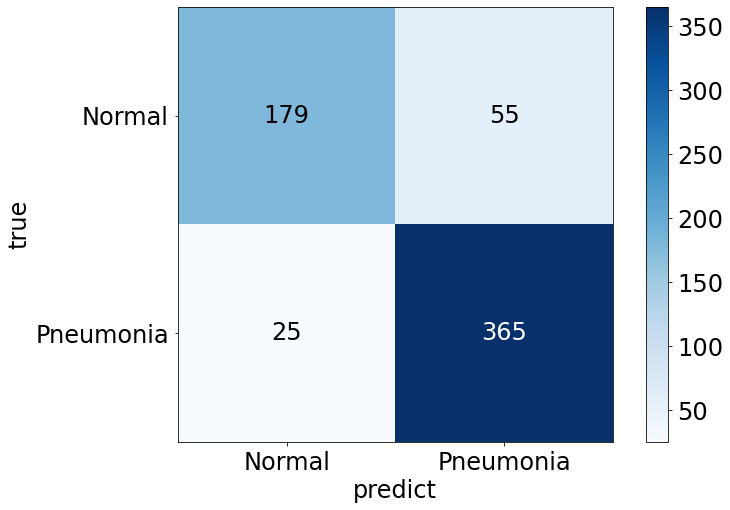

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib as mpl 
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
from prepare_data.pneumonia import load_data, load_img

plt.rc('font', size=24)           # controls default text sizes
plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
plt.rc('xtick', labelsize=24)      # fontsize of the tick labels
plt.rc('ytick', labelsize=24)     # fontsize of the tick labels
plt.rc('legend', fontsize=24)     # legend fontsize
plt.rc('figure', titlesize=24)    # fontsize of the figure title
from util.model import res_model_factory
from pathlib import Path

model = res_model_factory()
input_shape = (150,150)
#input_shape = (224,224)
initial_lr = 1e-4
epochs = 1000
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(initial_lr, decay = 1e-5)
model.compile(
      optimizer = optimizer,
      loss = loss_fn,
      metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
      ],
    )
batch_size = 16

exp = 'expr_pneumonia_resnet'
#method = 'simple_gamma_mean_0_5'
method = 'gamma_mean_0_5'
#method = 'mean'
#method = 'geometric_median'

expr_file = Path('./experiments/{}/seed_1/{}_cpr_all.npz'.format(exp, method))

root_path = Path('./prepare_data/CellData/chest_xray')
train_dir = root_path / 'train'
val_dir = root_path / 'val'
test_dir = root_path / 'test'

if expr_file.is_file():
    prev_results = np.load(expr_file, allow_pickle=True)
    server_weights = prev_results['server_weights'].tolist()
    model.set_weights(server_weights)
    history = prev_results['history'].tolist()
    history_delta_sum = prev_results['history_delta_sum'].tolist()
    FL_round = len(history)
    
    test_x, test_y = load_img(test_dir, input_shape = input_shape)
    print("Total number of validation examples: ", test_x.shape)
    print("Total number of labels:", test_y.shape)
    
    loss, acc, precision, recall = model.evaluate(test_x, test_y, verbose=0, batch_size=16)
    #Great recall, low false negative (type-2 error)
    print("loss = {}, accuracy = {}, precision = {}, recall = {}, total {} rounds federated learning "\
          .format(loss,acc, precision, recall,FL_round))

    # Get the confusion matrix
    # Get predictions
    preds = model.predict(test_x, batch_size=16)
    preds = np.around(preds).astype(int)
    # Original labels = test_y
    from mlxtend.plotting import plot_confusion_matrix
    from sklearn.metrics import confusion_matrix
    cm  = confusion_matrix(test_y, preds)
    plt.figure()
    fig, ax = plot_confusion_matrix(cm, figsize = (12,8), hide_ticks=True,cmap=plt.cm.Blues, colorbar = True)
    ax.set_ylabel('true', fontsize = 24)
    ax.set_xlabel('predict', fontsize = 24)
    plt.xticks(range(2), ['Normal', 'Pneumonia'], fontsize = 24)
    plt.yticks(range(2), ['Normal', 'Pneumonia'], fontsize = 24)
    plt.show()
    fig.savefig('plot/{}_{}_confusion_matrix.png'.format(exp, method), format='png', bbox_inches='tight')
else:
    print('{} does not exist, please run experiment first.'.format(expr_file))